# Plotting a function using Legendre Polynomial

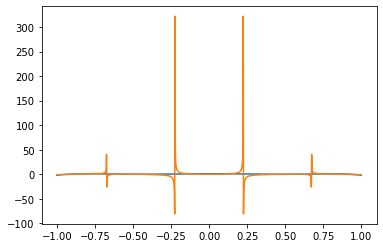

In [6]:
from pylab import *
from numpy import *
%matplotlib inline

N = 1000
x = linspace(-1.0,1.0,N+1)
U = array([x**0])
order = 7

for i in range(1,order):
    U = concatenate((U,[x**i]))
    
def dotproduct(f,g):
    integral = 0.0
    a = -1.0
    b = 1.0
    h = (b-a)/N
    def dot(x,y):
        return x*y
    for s in range(0,N-1,2):
        y0 = dot(f[s],g[s])
        y1 = 4*dot(f[s+1],g[s+1])
        y2 = dot(f[s+2],g[s+2])
        integral += (h/3)*(y0+y1+y2)
    return integral

V = array([ U[0]/sqrt(dotproduct(U[0],U[0])) ])

for i in range(1,order):
    m = len(V)
    w = w1 = U[i]
    for j in range(0,m):
        w1 -= ( dotproduct(w,V[j]) )*V[j]
    v = w1/(sqrt(dotproduct(w1,w1)))
    V = concatenate((V,[v]))
    
n = order
def h(x):
    return tan(7*x)*sin(5*x)  ############## type the function that you want to plot here ##############
C_Array = zeros(n)
for i in range(n):
    C_Array[i] = dotproduct(h(x),V[i])
approx_f_vals = zeros(N+1)
for i in range(n):
    approx_f_vals += C_Array[i] * V[i]
#xlim(-1,1)
plot(x,approx_f_vals)
plot(x,h(x))
#legend(['omega','energy','theta'],loc='upper right')